<a href="https://colab.research.google.com/github/Daffaaq/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Daffa Aqila Rahmatullah

Nim: 2041720098

Kelas: TI-3G

# Object Detection



1.   Template Matching
2.   Edge Detection
3.   Corner Detection
4.   Grid Detection
5.   Contour Detection



In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Template Matching

Menggunakan library openCV

cv.match.Template(), dengan parameter.


*   Image: citra input
*   templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
*   method: metode dari template matching

jenis metode template matching di openCV:


1.   TM_SQDIFF
2.   TM_SQDIFF_NORMED
3.   TM_CCORR
4.   TM_CCORR_NORMED
5.   TM_CCOEFF
6.   TM_CCOEFF_NORMED

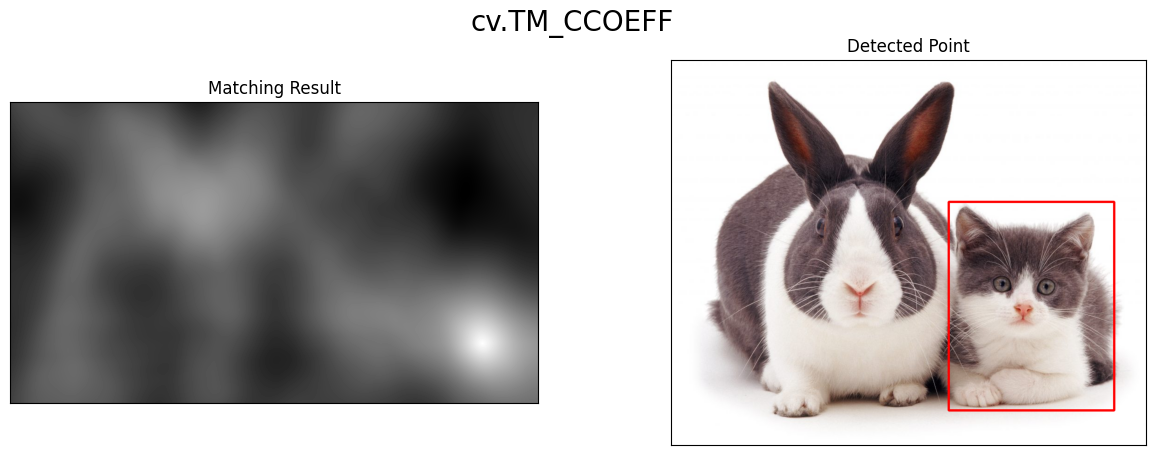

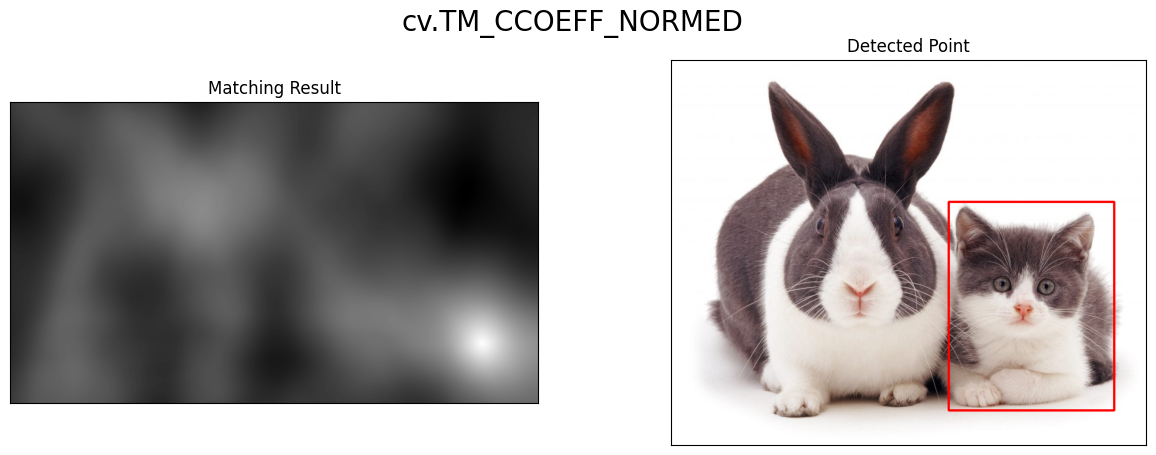

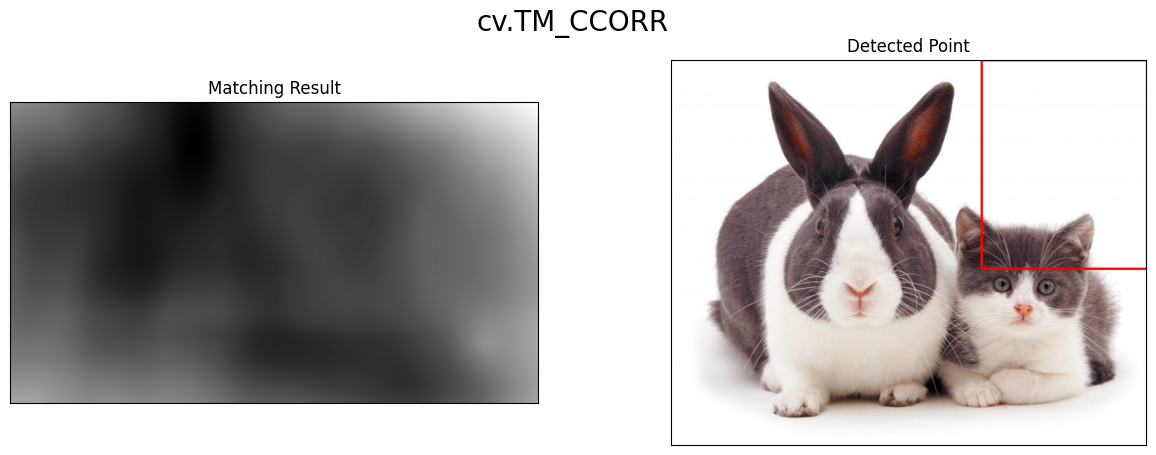

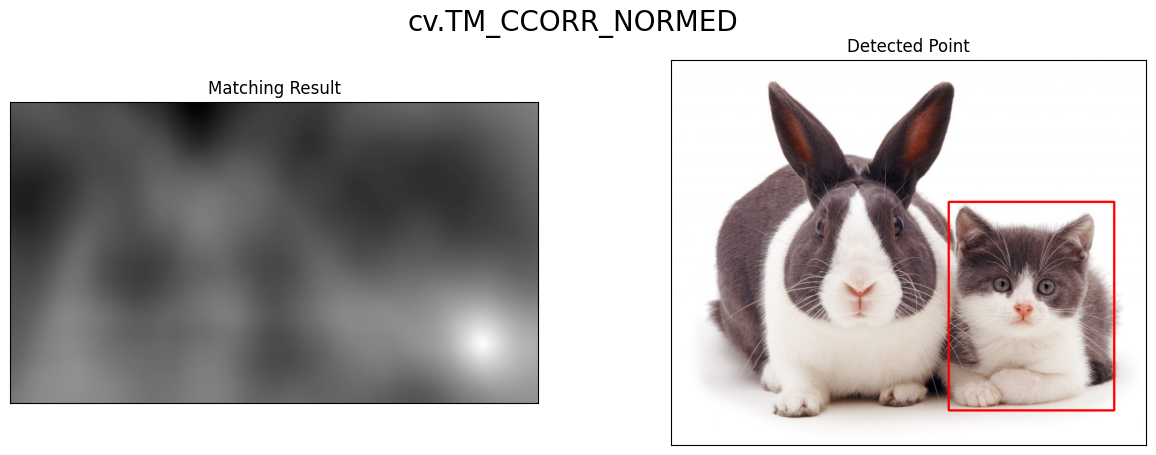

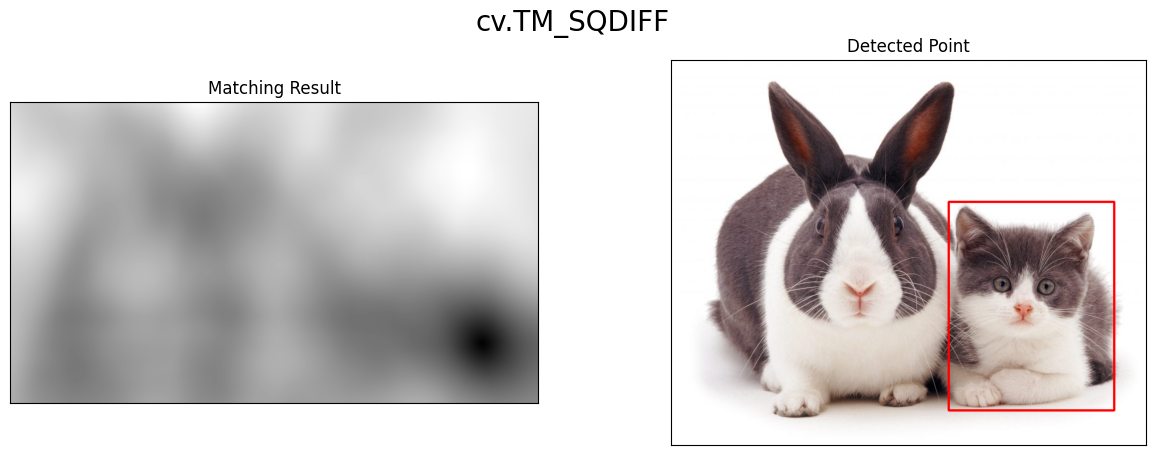

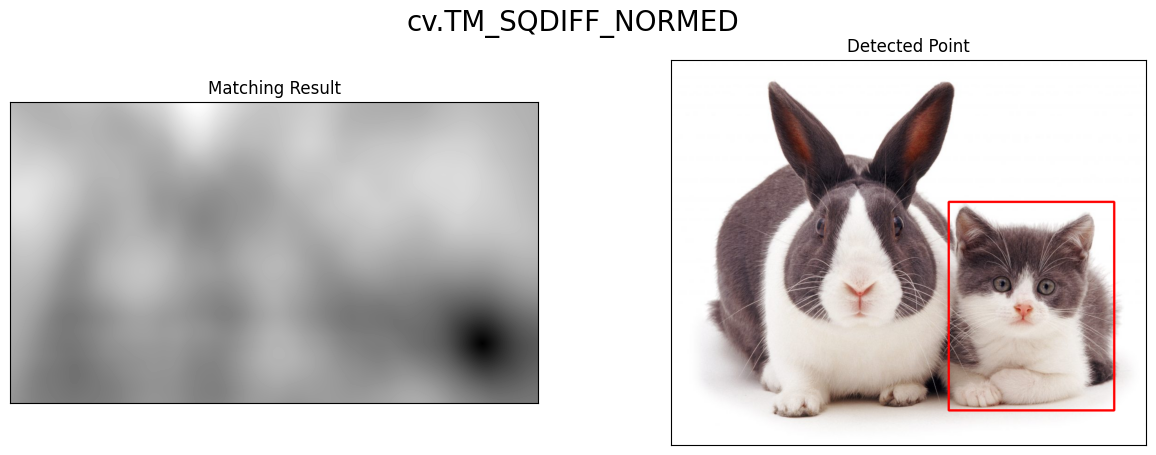

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load input image and template
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/cat2_templatejpg.jpg', 0)

# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Get template width and height
w, h = template.shape[::-1]

# Define template matching methods to be used
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# Loop over each method
for meth in methods:
    # Create copy of input image
    img_copy = img.copy()

    # Get template matching method
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img_gray, template, method)

    # Get top-left corner of the best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Get bottom-right corner of the best match
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the best match
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 3)

    # Plot the results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.imshow(res, cmap='gray')
    ax1.set_title('Matching Result')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
    ax2.set_title('Detected Point')
    ax2.set_xticks([])
    ax2.set_yticks([])
    fig.suptitle(meth, fontsize=20)
    plt.show()


### tanpa library

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load input image and template
img = cv2.imread('bahrain.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

# Get template size
template_height, template_width = template.shape[:2]

# Compute normalized cross-correlation
corr_map = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)

# Define threshold value
threshold = 0.8

# Perform non-maximum suppression
def non_max_suppression(corr_map, size):
    mask = np.zeros_like(corr_map, dtype=np.bool)
    for y in range(size, corr_map.shape[0]-size):
        for x in range(size, corr_map.shape[1]-size):
            if corr_map[y, x] > threshold:
                patch = corr_map[y-size:y+size+1, x-size:x+size+1]
                if corr_map[y, x] == np.max(patch):
                    mask[y, x] = True
    return mask

# Apply non-maximum suppression
mask = non_max_suppression(corr_map, size=15)

# Draw bounding boxes around matched regions
img_bounding_boxes = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for y, x in np.argwhere(mask):
    cv2.rectangle(img_bounding_boxes, (x, y), (x+template_width, y+template_height), (0, 0, 255), 2)

# Display original image, template, and image with bounding boxes
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[2].imshow(img_bounding_boxes)
ax[2].set_title('Matched Regions')
plt.show()


AttributeError: ignored

### Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV

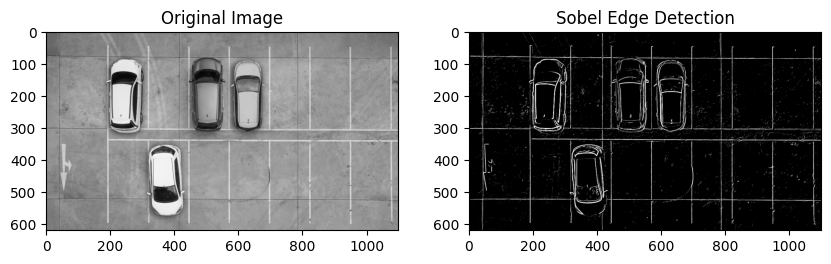

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Sobel filter kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Filter image using filter2D
filtered_image_x = cv.filter2D(image_original, -1, sobel_kernel_x)
filtered_image_y = cv.filter2D(image_original, -1, sobel_kernel_y)

# Combine X and Y Sobel edge detection
sobel_edge_detection = cv.bitwise_or(filtered_image_x, filtered_image_y)

# Thresholding
threshold_value = 50
sobel_edge_detection[sobel_edge_detection < threshold_value] = 0

# Display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(sobel_edge_detection, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
plt.show()


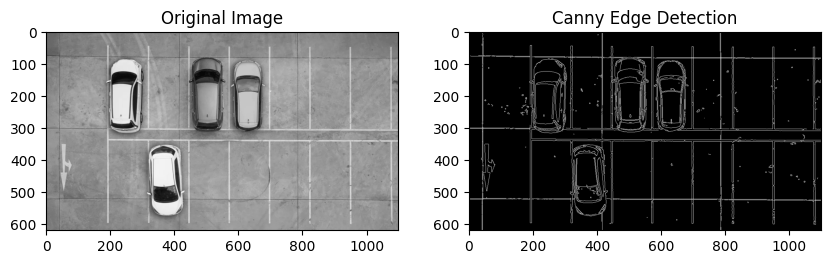

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv.Canny(image_original, 100, 200)

# Display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
plt.show()


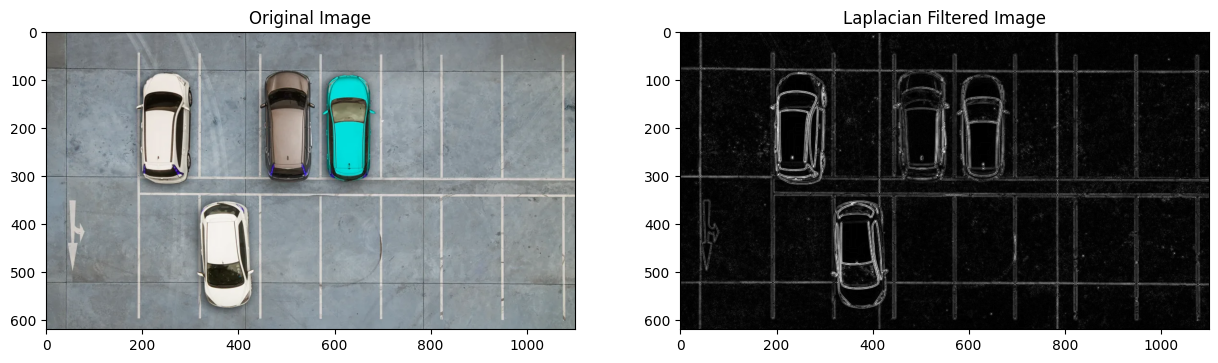

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/car-park.jpg')

# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

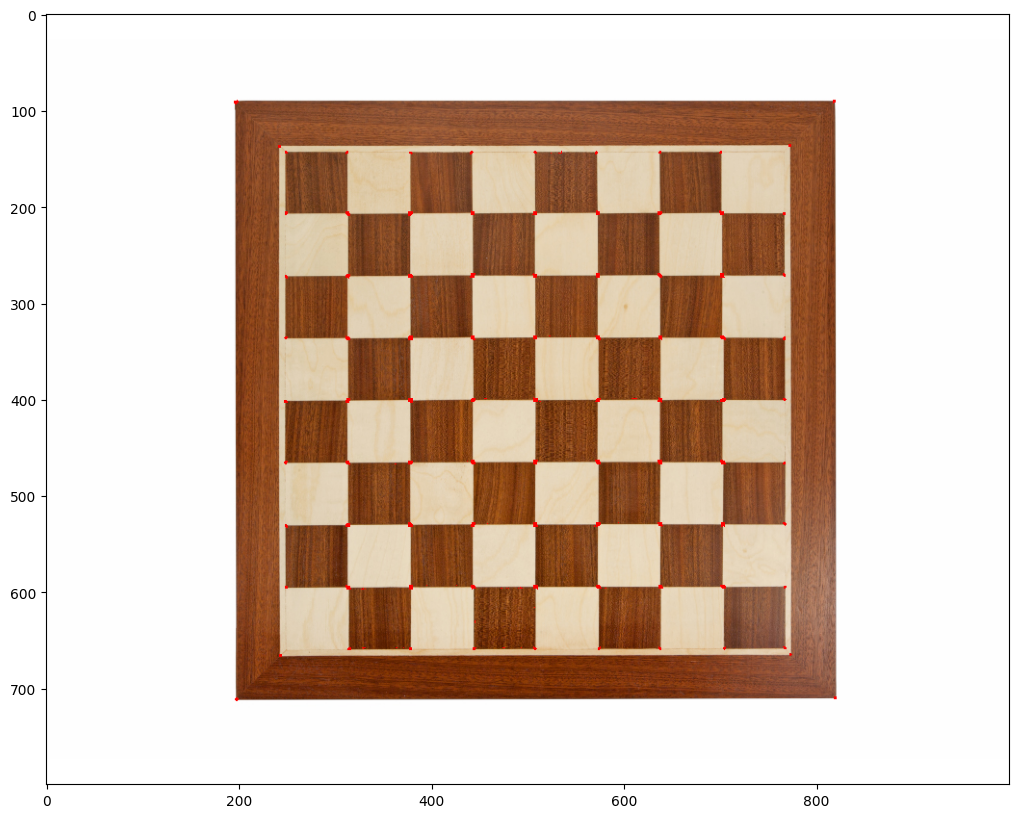

In [16]:
#load citra input 
input_img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

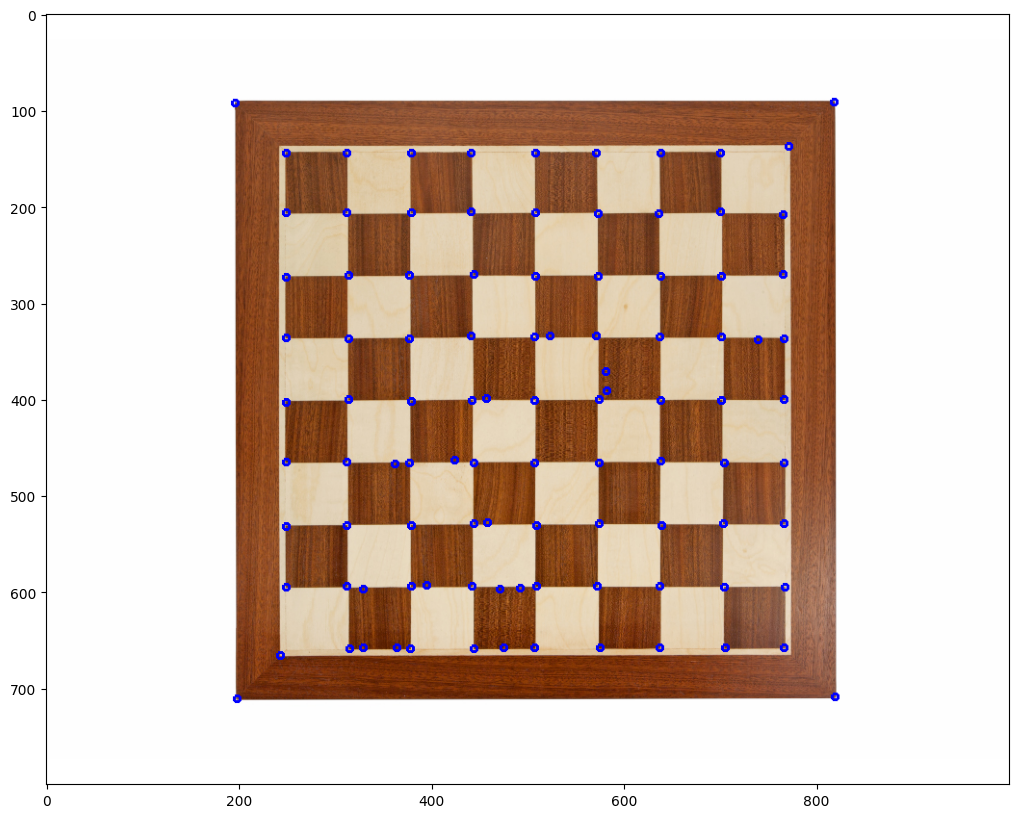

In [17]:
input_img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))